In [330]:
##importing dependecies, some might be additional
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import helper_line as hp
from sklearn import preprocessing
import matplotlib.pyplot as plt
import time as tm
import scipy as sp


In [331]:
## loading data sets and converting them to numpy arrays
data_x = pd.read_csv('diabetesX.csv')
data_y = pd.read_csv('diabetesY.csv', header = None)
data_x['ones'] =np.ones((data_x.shape[0],1))##wihtout intercept loss reduction is very less, but why?
X = data_x.values
Y = data_y.values


In [332]:
## Define the objective function
def loss_objective(X,Y,beta, z, lambd):
    return  ((np.linalg.norm(Y - np.dot(X, beta)))**2)*(1 / np.shape(X)[0]) + (lambd * np.sum(abs(z)))

## define shrinkage for z
def shrinkage(X, kappa):
    return (np.sign(X) *( np.maximum(np.absolute(X) - kappa, np.zeros(np.shape(X)))))


In [333]:
def admm_optimizer(X, Y, beta, rho = 1, lambd = 0.1,num_steps = 1000):
    ##Initializing z and u
    m,n = X.shape
    z = np.random.rand(n,1)
    u = np.random.rand(n,1)
    XtY = np.dot(X.T, Y)
    XtX = np.dot(X.T, X)
    L_U = sp.linalg.lu_factor(XtX + rho * np.identity(n))
    loss_list = []
    ##looping 1000 times
    for i in range(num_steps):
        beta = sp.linalg.lu_solve(L_U, XtY + rho * (z - u))
        z = shrinkage(beta + u, lambd/rho)
        u = u + beta - z
        loss = loss_objective(X,Y,beta, z, lambd)
        loss_list.append(loss)
    return beta, loss_list

In [358]:
# starting with random betas
beta = np.random.rand(X.shape[1],1)

In [364]:
beta , cost  = admm_optimizer(X, Y, beta, rho =1, lambd = 0.0001,num_steps = 1000)


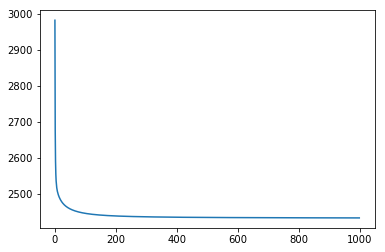

In [365]:
plt.plot(cost)
plt.show()
## what a fall, never seen anything like this

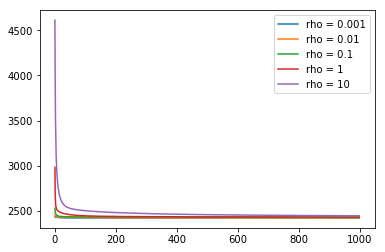

In [368]:
## looping to see effect of changing rho values
for i in range(5):
    beta_t= np.random.rand(X.shape[1],1)
    rhoo = 10**(-3+i)
    beta , cost  = admm_optimizer(X, Y, beta = beta_t, rho = rhoo, lambd = 0.0001,num_steps = 1000)
    plt.plot(cost)
plt.legend([ 'rho = 0.001', 'rho = 0.01','rho = 0.1','rho = 1','rho = 10'], loc='upper right')
plt.show()

## recommendations says rho should ne between 1 nd 1.8. in this case
## best performance is for rho = 0.1, but why, let me know if you know

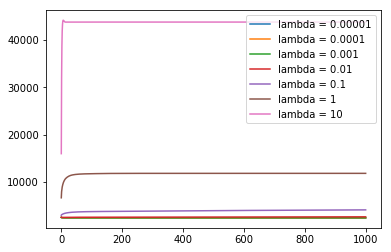

In [369]:
## changing values of lambda to see its effect on performance

for i in range(7):
    beta_t= np.random.rand(X.shape[1],1)
    lamb = 10**(-5+i)
    beta , cost  = admm_optimizer(X, Y, beta = beta_t , rho = 0.1, lambd = lamb,num_steps = 1000)
    plt.plot(cost)
plt.legend([ 'lambda = 0.00001','lambda = 0.0001','lambda = 0.001', 'lambda = 0.01','lambda = 0.1','lambda = 1','lambda = 10'], loc='upper right')
plt.show()

In [ ]:
## what ? loss started incereasing? any possible explanation?
## References :
## 1. https://web.stanford.edu/~boyd/papers/pdf/admm_slides.pdf
## 2. https://web.stanford.edu/~boyd/papers/admm/lasso/lasso.html

## still working on convergence